Import Modules<br>
<br>
Could not run epochs greater than 500. It crashed my computer.<br>
Predictions:<br>
[[0.06141153]<br>
 [0.05382535]<br>
 [0.3528062 ]<br>
 [0.6808359 ]]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

Load and split data, then check the number of data

In [3]:
dat = np.loadtxt('./and.csv', delimiter=',', skiprows=1)
data_train = dat[:, :-1] # Extract all columns except the last one (2d)
class_train = dat[:, -1] # Extract the last one column only (1d)
print('data:', data_train.shape)
print('class:', class_train.shape)

data: (4, 2)
class: (4,)


Model building and Learning

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(5, input_shape=(2,), activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())
model.fit(data_train, class_train, epochs=500, batch_size=1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 15        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
4/4 [==============================] - 0s 665us/step - loss: 0.6930 - accuracy: 0.5000
Epoch 2/500
4/4 [==============================] - 0s 997us/step - loss: 0.6886 - accuracy: 0.5000
Epoch 3/500
4/4 [==============================] - 0s 665us/step - loss: 0.6861 - accuracy: 0.5000
Epoch 4/500
4/4 [==============================] - 0s 664us/step - loss: 0.6839 - accuracy: 0.7500
Epoch 5/500
4/4 [==============================] - 0s

Find the predicted value for the training data

In [13]:
pred = model.predict(data_train)
print(pred)

[[0.06141153]
 [0.05382535]
 [0.3528062 ]
 [0.6808359 ]]


Prepare to draw a separating hyperplane:teaching signal

In [14]:
t1 = data_train[class_train==1]
t0 = data_train[class_train==0]
t1_x = t1[:,0] # X-coordinate of a point(teaching signal of 1)
t1_y = t1[:,1] # Y-coordinate of a point(teaching signal of 1)
t0_x = t0[:,0] # X-coordinate of a point(teaching signal of 0)
t0_y = t0[:,1] # Y-coordinate of a point(teaching signal of 0)

Prepare to draw a separating hyperplane: grid points

In [15]:
g = np.loadtxt('./grid01_21x21.csv', delimiter=',')
pred_g = model.predict(g)[:,0]
g1 = g[pred_g>=0.5] # Predicted value (>=0.5) belongs to 1
g0 = g[pred_g<0.5]  # Predicted value (<0.5) belongs to 0
g1_x = g1[:,0] # X-coordinate of predicted points belongs to 1
g1_y = g1[:,1] # Y-coordinate of predicted points belongs to 1
g0_x = g0[:,0] # X-coordinate of predicted points belongs to 0
g0_y = g0[:,1] # Y-coordinate of predicted points belongs to 0

Draw a separating hyperplane

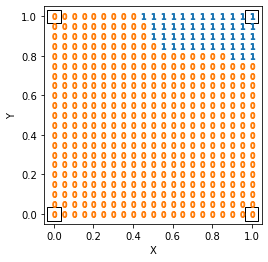

In [16]:
plt.scatter(t1_x, t1_y, marker='s',facecolors='none',edgecolors='black',s=180)
plt.scatter(t0_x, t0_y, marker='s',facecolors='none',edgecolors='black',s=180)
plt.scatter(g1_x,g1_y,marker='$1$')
plt.scatter(g0_x,g0_y,marker='$0$')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()